#Decision Tree Classification and Evaluation

### Author: Frederico Tremonti



In [95]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive, data_table
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/IS4482_DataSets/CD_additional_balanced.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### High-Level Analysis of the Dataset

In [96]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9280.000000,9280,9280,9280,9280,9280,9280,9280,9280,9280,...,9280.000000,9280.000000,9280.000000,9280,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280
unique,NaN,12,4,8,2,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,2517,5338,3007,7824,4951,7688,6672,2533,2000,...,NaN,NaN,NaN,7244,NaN,NaN,NaN,NaN,NaN,4640
mean,40.403448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333297,887.282435,0.315302,NaN,-0.496272,93.479178,-40.218125,2.960209,5135.306487,NaN
std,12.062030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.334467,313.802415,0.700671,NaN,1.721204,0.634510,5.360642,1.890402,87.105317,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

In [98]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We should not naively trust the results of the above functions because pandas can't interpret strings that represent NULL values as NULL values. For example, under column "poutcome" we see that there are values that are "nonexistent" and under "marital" there are "unknown" values; however, pandas isn't able to detect those as a NULL values and, therefore, claims that there are only non-null values in the df.info() table.

####Analyzing "Age" variable

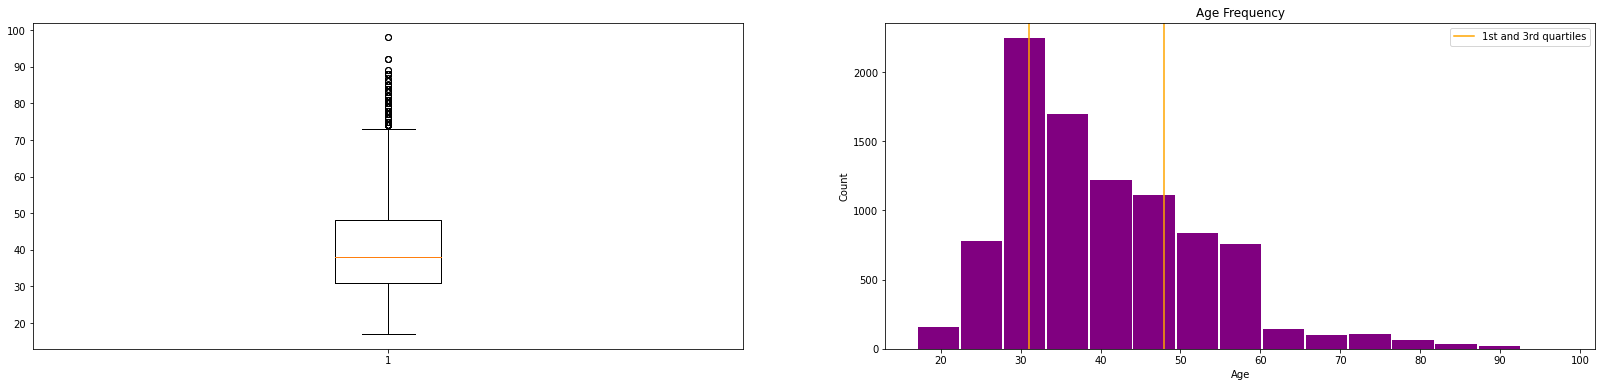

In [99]:
#Analyzing column Age with some descriptive stats.
#Box plot, IQR, histogram
plt.figure(figsize=(28, 6))
plt.title("Analysis: Column 'Age'")
ax = plt.subplot(1, 2, 1)
plt.boxplot(df['age'])
ax2 = plt.subplot(1, 2, 2)
plt.hist(df['age'], bins=15, rwidth=0.96, color='purple')
plt.axvline(np.quantile(df['age'], 0.25), color='orange')
plt.axvline(np.quantile(df['age'], 0.75), color='orange')
plt.title('Age Frequency')
plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(labels=["1st and 3rd quartiles"])
plt.show()

The .describe() function shows that the range of the data is 81 and the interquartile range is observed between the ages of 31 and 48. Although 50% percente of the data is encountered within 17 data values, in this case, it seems very reasonable since this dataset relates to bank activities and the population 31y.o. - 48y.o. is probably the most economically active. The graph on the left is a box plot that provides a visual picture of the interquartile range mentioned and, the histogram on the right, helps us visualize how a big chunk of the dataset is indeed concentrated between the ages 31 and 48. 

#### Class distribution

In [100]:
#Analyzing distribution of classes in the dependent variable.
df['y'].value_counts()

yes    4640
no     4640
Name: y, dtype: int64

In [101]:
#Transforming class distribution into percentages.
df['y'].value_counts(normalize=True).mul(100).astype(str) + "%"

yes    50.0%
no     50.0%
Name: y, dtype: object

The distribution of the target variable is balanced since each of the two values corresponds to 50% of the distribution.

#### Preparing Data for Train-Test Split

In [102]:
#Creating a list with all object variables from the main dataframe df
object_variables = list(df.select_dtypes(include='object').columns)

In [103]:
#Creating a list with all integer variables from the main dataframe df
integer_variables = list(df.select_dtypes(include='int64').columns)

In [104]:
#Creating a list with all float variables from the main dataframe df
float_variables = list(df.select_dtypes(include='float64').columns)

In [105]:
#Creating a list with the variables we want to convert to categorical data (string/object - categories / integers - discrete). 
#Float variables are continuous data, thus can't be categorical.
categ_variables_list = object_variables + integer_variables

In [106]:
#This list is created so we can use when calling df[COLUMN NAME(S)], this way we don't have to type them repeatedly.
categ_variables_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y',
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [107]:
#Must remove 'y' because that's our dependant variable, therefore, wont be use when creating a one hot dataframe. This is the variable we are trying to predict.
categ_variables_list.remove('y')

In [108]:
#Converting int and object variable to categorical data.
df[categ_variables_list] = df[categ_variables_list].astype('category')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             9280 non-null   category
 1   job             9280 non-null   category
 2   marital         9280 non-null   category
 3   education       9280 non-null   category
 4   default         9280 non-null   category
 5   housing         9280 non-null   category
 6   loan            9280 non-null   category
 7   contact         9280 non-null   category
 8   month           9280 non-null   category
 9   day_of_week     9280 non-null   category
 10  duration        9280 non-null   category
 11  campaign        9280 non-null   category
 12  pdays           9280 non-null   category
 13  previous        9280 non-null   category
 14  poutcome        9280 non-null   category
 15  emp.var.rate    9280 non-null   float64 
 16  cons.price.idx  9280 non-null   float64 
 17  cons.conf.idx 

In [110]:
#Use this to augment data and cause a better training.
df_onehot = pd.get_dummies(df, columns=categ_variables_list)

In [111]:
df_onehot.head(7)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,pdays_26,pdays_27,pdays_999,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6
0,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
1,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
5,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
6,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [112]:
#perfoming a sanity check. We see that the onehot dataframe has 1602 columns because EACH value becomes a column.
#Thus the sanity check consists of counting the unique values from each column (unique returns a list, thus we use len to get the len of each list) 
#from the original dataframe and then adding the result to the number of columns that weren't touched (float + dependent).
#The sum should equal the number of columns in the onehot dataframe which is 1602.
total_count = 0
for column in categ_variables_list:
  print(f"Number of {column} variables: {len(df[column].unique())}")
  total_count += len(df[column].unique())
# 1 -> y variable
total_count += len(float_variables) + 1
print(total_count) 

Number of job variables: 12
Number of marital variables: 4
Number of education variables: 8
Number of default variables: 2
Number of housing variables: 3
Number of loan variables: 3
Number of contact variables: 2
Number of month variables: 10
Number of day_of_week variables: 5
Number of poutcome variables: 3
Number of age variables: 75
Number of duration variables: 1402
Number of campaign variables: 33
Number of pdays variables: 27
Number of previous variables: 7
1602


#### Train-Test Splitting the Dataset

In [113]:
#Splitting the one hot dataframe into train and test dataframes. train_test_split() returns two dataset: training and testing, respectively. 
#train_test_split() is taking three parameter: the dataset we want to split, the percentage of the original dataset that will be designated to the testing set (in this case 30%)
#and the random_state that corresponds to the shuffling applied to the data.
train_df, test_df = train_test_split(df_onehot, test_size=0.3, random_state=0)

In [114]:
train_df.describe(include='all')

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,pdays_26,pdays_27,pdays_999,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6
count,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496,6496.000000,6496.000000,6496.000000,6496.000000,...,6496.000000,6496.0,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3249,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-0.497675,93.477503,-40.242580,2.955366,5135.364640,NaN,0.270782,0.194119,0.033713,0.021706,...,0.000154,0.0,0.886546,0.779249,0.156404,0.042642,0.015086,0.004464,0.001847,0.000308
std,1.723507,0.635382,5.374951,1.891475,87.007012,NaN,0.444398,0.395552,0.180503,0.145732,...,0.012407,0.0,0.317172,0.414785,0.363266,0.202063,0.121905,0.066671,0.042944,0.017545
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [115]:
test_df.describe(include='all')

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,pdays_26,pdays_27,pdays_999,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6
count,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784,2784.000000,2784.000000,2784.000000,2784.000000,...,2784.0,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,1393,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-0.492996,93.483085,-40.161063,2.971509,5135.170797,NaN,0.272270,0.182471,0.031968,0.026940,...,0.0,0.000359,0.889727,0.783764,0.147989,0.046695,0.015086,0.005388,0.000718,0.000359
std,1.716121,0.632567,5.327628,1.888187,87.349770,NaN,0.445208,0.386302,0.175948,0.161936,...,0.0,0.018952,0.313286,0.411751,0.355152,0.211024,0.121918,0.073218,0.026798,0.018952
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.800000,92.945500,-42.700000,1.244000,5076.200000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.400000,93.994000,-36.400000,4.958000,5228.100000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [116]:
#Verifying the distribution of classes in the training dataset. The numbers make sense since the original dataset were 50/50
train_df['y'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

no     50.02%
yes    49.98%
Name: y, dtype: object

In [117]:
#Verifying the distribution of classes in the testing dataset. The numbers make sense since the original dataset were 50/50
test_df['y'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

yes    50.04%
no     49.96%
Name: y, dtype: object

#### Preparing One-Hot Encoded Data to Fit a Decision Tree Classifier

In [118]:
#Creating a list of independent variables. Remember, to train the Decision we are using the onehot dateset which was used to create the trainin and testing datasets.
#Below we concatenate the list of columns from both training and testing set. Then we create a set so it removes duplicates and finally we turn the set without duplicates into a list again.
independent_variables_list = list(set(list(train_df.columns) + list(test_df.columns)))

In [119]:
independent_variables_list

['day_of_week_fri',
 'duration_704',
 'age_67',
 'previous_1',
 'duration_327',
 'duration_276',
 'duration_259',
 'duration_767',
 'duration_414',
 'duration_670',
 'duration_373',
 'duration_613',
 'duration_876',
 'duration_1130',
 'duration_730',
 'age_62',
 'duration_183',
 'duration_1123',
 'duration_550',
 'duration_1456',
 'duration_1435',
 'duration_702',
 'duration_539',
 'duration_77',
 'duration_272',
 'duration_362',
 'duration_898',
 'duration_195',
 'duration_25',
 'duration_109',
 'duration_219',
 'duration_1602',
 'duration_1085',
 'age_40',
 'duration_181',
 'duration_344',
 'duration_2462',
 'duration_894',
 'duration_210',
 'duration_873',
 'duration_83',
 'duration_791',
 'duration_821',
 'duration_786',
 'pdays_13',
 'duration_1340',
 'duration_1550',
 'duration_1152',
 'duration_845',
 'duration_616',
 'duration_1012',
 'duration_748',
 'duration_746',
 'duration_185',
 'duration_236',
 'duration_629',
 'duration_115',
 'duration_719',
 'duration_107',
 'duration

In [120]:
#Must remove 'y' since it is our dependent variable.
independent_variables_list.remove('y')

In [121]:
# verifying that the length of independet_variables_list is total (1602) minus 1
len(independent_variables_list)

1601

In [122]:
dependent_variable_list = ['y']

In [123]:
#Must convert x_train dataset to a numpy array in order to fit the tree. 
x_train = train_df[independent_variables_list].to_numpy()
#Must convert x_test dataset to a numpy array in order to predict. 
x_test = test_df[independent_variables_list].to_numpy()
#verifying that number of instances is divided 70/30 between train and test and that number of variables is total (1602) minus 1
x_train.shape, x_test.shape

((6496, 1601), (2784, 1601))

In [124]:
#Must convert y_train dataset to a numpy array in order to fit the tree. 
y_train = train_df[dependent_variable_list].to_numpy()
#Must convert x_test dataset to a numpy array in order to predict. 
y_test = test_df[dependent_variable_list].to_numpy()
#verifying that number of instances is divided 70/30 between train and test and that number of variables is 1
y_train.shape, y_test.shape

((6496, 1), (2784, 1))

#### Building the Model

In [125]:
random_state = 0


In [126]:
#Instantiate DecisionTreeClassifier class by creating an object. This will be the object of our tree.
decision_tree = DecisionTreeClassifier(random_state=random_state)

In [127]:
decision_tree

DecisionTreeClassifier(random_state=0)

####Training the Model

In [128]:
#Use fit() method from DecisionTreeClassifer and fit it using the TRAINING datasets.
#Recall the TESTING dataset is only used to make predictions.
decision_tree = decision_tree.fit(x_train, y_train)

In [129]:
#Use export_text () to print the decision tree.
print(export_text(decision_tree))

|--- feature_1217 <= 5087.65
|   |--- feature_965 <= 0.50
|   |   |--- feature_252 <= 0.50
|   |   |   |--- feature_254 <= 0.50
|   |   |   |   |--- feature_449 <= 0.50
|   |   |   |   |   |--- feature_384 <= 0.50
|   |   |   |   |   |   |--- feature_386 <= 0.50
|   |   |   |   |   |   |   |--- feature_655 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1479 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_732 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1233 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 28
|   |   |   |   |   |   |   |   |   |   |--- feature_1233 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |   |   |--- feature_732 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |   |--- feature_1479 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- feature_655 >  0.50
|   |   |   |   | 

#### Predicting / Testing the Model

In [130]:
#Making predictions on the TESTING set after teaching the machine about our training set.
predictions = decision_tree.predict(x_test)

In [131]:
predictions

array(['no', 'yes', 'yes', ..., 'yes', 'yes', 'yes'], dtype=object)

In [132]:
#Assigning probabilities to the predictions. Since this is a binary variable, most of the time the algorith will designate 100% to its predictions.
#Sometimes, if the algorith is very uncertain, it will assign 0.5/0.5
predictions_probabilities = decision_tree.predict_proba(x_test)

In [133]:
predictions_probabilities

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

#### Preparing Data for Evaluation

In [134]:
#Creating a pandas dataframe that shows the predicted target class of the testing set, the predicted probabilities of the various classes of the testing set,
#and the ground truth class of the testing set.
#First, we must seperate the probabilities for each class in the testing set (aka predictions_probabilities array)

predictions_probabilities_class_0 = predictions_probabilities[:, 0]
#In the line above : means all rows, and zero is the first element (column) of each row. This way, we get all values for the first class aka "no"
predictions_probabilities_class_1 = predictions_probabilities[:, 1]
#In the line above : means all rows, and 1 is the second element (column) of each row. This way, we get all values for the second class aka "yes"


In [135]:
predictions_summary_df = pd.DataFrame(data={'Predicted Class': predictions, 
                                            'Predicted Probabilities Class - No': predictions_probabilities_class_0, 
                                            'Predicted Probabilities Class - Yes': predictions_probabilities_class_1,
                                            'Groud Truth': y_test.reshape(-1)})

In [136]:
data_table.enable_dataframe_formatter()

In [137]:
predictions_summary_df

,Predicted Class,Predicted Probabilities Class - No,Predicted Probabilities Class - Yes,Groud Truth
0,no,1.0,0.0,no
1,yes,0.0,1.0,no
2,yes,0.0,1.0,yes
3,no,1.0,0.0,no
4,no,1.0,0.0,yes
...,...,...,...,...
2779,no,1.0,0.0,no
2780,no,1.0,0.0,no
2781,yes,0.0,1.0,no
2782,yes,0.0,1.0,no


In [138]:
data_table.disable_dataframe_formatter()

#### Evaluating the Model with Confusion Matrix and Classification Report

In [139]:
print('CONFUSION MATRIX')
print(f"{'yes' :>6}{'no' :>5}")
print(confusion_matrix(y_test, predictions, labels=['yes', 'no']))

CONFUSION MATRIX
   yes   no
[[ 929  464]
 [ 336 1055]]


In [140]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          no       0.69      0.76      0.73      1391
         yes       0.73      0.67      0.70      1393

    accuracy                           0.71      2784
   macro avg       0.71      0.71      0.71      2784
weighted avg       0.71      0.71      0.71      2784



In the confusion matrix above, row and column 1 represent the "yes" class and row and column 2 represent the "no" class. Saying it differently, the number on the (1)top-left represent the number of "yes" values that the model predicted to be "yes" and was indeed "yes" (also known as true positive); (2)the number on the top-right represent the number of values that the model predicted to be "no", but it was actually "yes" (also known as false negative); (3)the number on the bottom-left represents the number of values that the model predicted to be "yes", but it was actually "no" (also known as false positive); and (4) the number on the bottom-right represents the number of values that the model predicted to be "no" and it was indeed "no" (also known as true negatives). Moving to the classification report, precision is the proportion of true values among what was predicted for each particular class. Hence, the precision for the class "yes" is 0.74 because we divide 905 (number of true positives) by 1217, which is the total number of "yes" predictions (true positives + false positives, since we are looking at the class "yes"). Moreover, recall is the proportion of true values among the *actual* elements of each class. Hence, the recall for the class "no" is 0.78 because we divide 1079 (number of true negatives) by 1391, which is the total number of "no" that actually happened (true negatives + false positives, since we are looking at the class "no").   

### Creating a Simplified Model

In [141]:
#Repeating task IV A, but implementing the ccp_alpha kwarg which simplifies the tree.
decision_tree_simplified = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005)

In [142]:
decision_tree_simplified

DecisionTreeClassifier(ccp_alpha=0.005, random_state=0)

In [143]:
decision_tree_simplified = decision_tree_simplified.fit(x_train, y_train)

In [144]:
print(export_text(decision_tree_simplified))

|--- feature_1217 <= 5087.65
|   |--- class: yes
|--- feature_1217 >  5087.65
|   |--- feature_219 <= -46.65
|   |   |--- class: yes
|   |--- feature_219 >  -46.65
|   |   |--- feature_104 <= 93.96
|   |   |   |--- class: no
|   |   |--- feature_104 >  93.96
|   |   |   |--- class: no



####Plotting the Tree

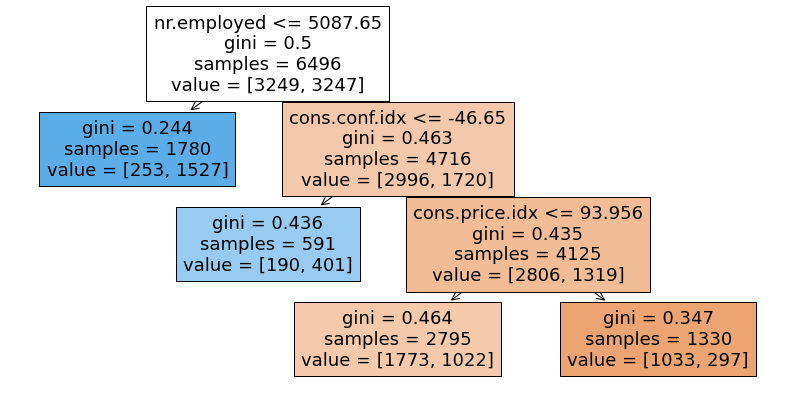

In [145]:
#Plotting the tree. Blues values are positive values which in this case are "yes" predictions, thus orange means "no" predictions. 
#The less transparent it is, the more certain the model is. White is uncertainty.
plt.figure(figsize=(14, 7))
plt.show(plot_tree(decision_tree_simplified, feature_names=independent_variables_list, filled=True))

In [146]:
#Computing predictions for the training set so we can later verify how the classifier did on the training set. 
predictions_1_train = decision_tree_simplified.predict(x_train)

In [147]:
#Predicting the testing set.
predictions_1_test = decision_tree_simplified.predict(x_test)

#### Evaluating Whether Model Has Been Overfitted or Underfitted

In [148]:
#Making predictions on both sets and then evaluating through metrics is a crucial step to see if we have overfitted or underfitted the model.
#Making extremely well on the training set is an indicator of overfitting. In other words, the model learn so well one specific dataset, that we it faces a different dataset,
#it makes too many errors because it is ony able to predict the training set.
print(f"{'TRAINING SET' :>33}")
print('')
print('CONFUSION MATRIX')
print(f"{'yes' :>6}{'no' :>5}")
print(confusion_matrix(y_train, predictions_1_train, labels=['yes', 'no']))
print(classification_report(y_train, predictions_1_train))
print('-' * 56)
print(f"{'TESTING SET' :>33}")
print('')
print('CONFUSION MATRIX')
print(f"{'yes' :>6}{'no' :>5}")
print(confusion_matrix(y_test, predictions_1_test, labels=['yes', 'no']))
print(classification_report(y_test, predictions_1_test))

                     TRAINING SET

CONFUSION MATRIX
   yes   no
[[1928 1319]
 [ 443 2806]]
              precision    recall  f1-score   support

          no       0.68      0.86      0.76      3249
         yes       0.81      0.59      0.69      3247

    accuracy                           0.73      6496
   macro avg       0.75      0.73      0.72      6496
weighted avg       0.75      0.73      0.72      6496

--------------------------------------------------------
                      TESTING SET

CONFUSION MATRIX
   yes   no
[[ 849  544]
 [ 177 1214]]
              precision    recall  f1-score   support

          no       0.69      0.87      0.77      1391
         yes       0.83      0.61      0.70      1393

    accuracy                           0.74      2784
   macro avg       0.76      0.74      0.74      2784
weighted avg       0.76      0.74      0.74      2784



####Conclusion

In general, this simplified version of the decision tree did better in the testing set than in the training. When comparing metrics for each class on both sets (i.e., training "no" vs testing "no" and training "yes" vs testing "yes") such as precision, recall, and f1-score we can observe that the testing set has better results. The reason why the evaluation is different has to do with the fact that these are indeed treated as two different datasets, even though they were initially in the same dataset (df). If the off-diagonal elements (also known as false positives and false negatives) on the trainig set were all zeros, than we could say that the model is only making correct predictions and, therefore, has likely been overfitted.

# Making and Evaluating Different Models for the Same Dataset

In [149]:
#Removing the duration values from the columns that will be used to fit the new tree.
independent_variables_list_without_duration = [x for x in independent_variables_list if "duration_" not in x]

In [150]:
independent_variables_list_without_duration

['day_of_week_fri',
 'age_67',
 'previous_1',
 'age_62',
 'age_40',
 'pdays_13',
 'campaign_11',
 'age_53',
 'age_36',
 'month_nov',
 'education_university.degree',
 'cons.price.idx',
 'age_49',
 'age_41',
 'age_73',
 'emp.var.rate',
 'month_jun',
 'education_basic.4y',
 'marital_married',
 'month_apr',
 'marital_unknown',
 'age_37',
 'age_45',
 'loan_yes',
 'age_33',
 'age_18',
 'cons.conf.idx',
 'campaign_8',
 'age_25',
 'pdays_27',
 'job_unknown',
 'age_79',
 'previous_6',
 'education_basic.9y',
 'poutcome_failure',
 'education_basic.6y',
 'campaign_3',
 'pdays_20',
 'campaign_6',
 'marital_divorced',
 'age_56',
 'pdays_4',
 'previous_4',
 'pdays_8',
 'campaign_31',
 'campaign_30',
 'age_89',
 'age_70',
 'age_39',
 'age_76',
 'pdays_21',
 'campaign_7',
 'day_of_week_thu',
 'campaign_14',
 'age_78',
 'pdays_19',
 'age_23',
 'campaign_22',
 'campaign_5',
 'age_43',
 'pdays_3',
 'job_management',
 'campaign_23',
 'poutcome_nonexistent',
 'age_58',
 'pdays_15',
 'pdays_14',
 'previous_2

In [151]:
#repeating task 4A to create a new training and testing dataset without the "duration" variable
x_train_without_duration = train_df[independent_variables_list_without_duration].to_numpy()
x_test_without_duration = test_df[independent_variables_list_without_duration].to_numpy()

In [152]:
decision_tree_without_duration = DecisionTreeClassifier(random_state=random_state)

In [153]:
decision_tree_without_duration

DecisionTreeClassifier(random_state=0)

In [154]:
#y variable remained untouched so we don't need to create a new variable "y_without_duration"
decision_tree_without_duration = decision_tree_without_duration.fit(x_train_without_duration, y_train)

In [155]:
print(export_text(decision_tree_without_duration))

|--- feature_141 <= 5087.65
|   |--- feature_106 <= 0.50
|   |   |--- feature_30 <= 0.50
|   |   |   |--- feature_58 <= 0.50
|   |   |   |   |--- feature_144 <= 0.50
|   |   |   |   |   |--- feature_37 <= 0.50
|   |   |   |   |   |   |--- feature_51 <= 0.50
|   |   |   |   |   |   |   |--- feature_121 <= 1.26
|   |   |   |   |   |   |   |   |--- feature_112 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_125 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_28 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_28 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_125 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_122 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |   |   |--- feature_122 >  0.50
|   |   |   |   |   |   |   |   |   |

In [156]:
predictions_without_duration = decision_tree_without_duration.predict(x_test_without_duration)

In [157]:
probabilities_without_duration = decision_tree_without_duration.predict_proba(x_test_without_duration)

In [158]:
#Doing one step less, we don't need to create a new variable to set as the value of our probabilities keys.
sumarry_df_without_duration = pd.DataFrame(data=({"Predictions without duration": predictions_without_duration,
                                                  "Probability without duration - class No": probabilities_without_duration[:, 0],
                                                  "Probability without duration - class Yes": probabilities_without_duration[:, 1],
                                                  "Ground Truth": y_test.reshape(-1)}
                                                 ))

In [159]:
data_table.enable_dataframe_formatter()

In [160]:
sumarry_df_without_duration

,Predictions without duration,Probability without duration - class No,Probability without duration - class Yes,Ground Truth
0,no,1.0,0.0,no
1,no,1.0,0.0,no
2,yes,0.0,1.0,yes
3,no,1.0,0.0,no
4,yes,0.0,1.0,yes
...,...,...,...,...
2779,no,1.0,0.0,no
2780,yes,0.0,1.0,no
2781,yes,0.0,1.0,no
2782,yes,0.0,1.0,no


In [161]:
data_table.disable_dataframe_formatter()

In [162]:
#Printing metrics to see how weel the model did.
print('CONFUSION MATRIX')
print(f"{'yes' :>4}{'no' :>4}")
print(confusion_matrix(y_test, predictions_without_duration, labels=['yes', 'no']))
print(classification_report(y_test, predictions_without_duration))

CONFUSION MATRIX
 yes  no
[[911 482]
 [474 917]]
              precision    recall  f1-score   support

          no       0.66      0.66      0.66      1391
         yes       0.66      0.65      0.66      1393

    accuracy                           0.66      2784
   macro avg       0.66      0.66      0.66      2784
weighted avg       0.66      0.66      0.66      2784



This model seems to be worse than the model with "duration" variables. That's because when we compare the metrics, this one has shown to be less precise, accurate, etc. Especifically when we compare the f1 score of the two models, which is the harmonic mean of precision and recall, we see that without the "duration" column, the model presents more errors.

In [163]:
#Repeating task IV A, but implementing the max_leaf_nodes kwarg, which simplifies the tree by creating a ceiling for the number of leaf nodes.
decision_tree_without_duration_simplified = DecisionTreeClassifier(random_state=random_state, max_leaf_nodes=11)

In [164]:
decision_tree_without_duration_simplified

DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)

In [165]:
decision_tree_without_duration_simplified = decision_tree_without_duration_simplified.fit(x_train_without_duration, y_train)

In [166]:
print(export_text(decision_tree_without_duration_simplified))

|--- feature_141 <= 5087.65
|   |--- feature_106 <= 0.50
|   |   |--- class: yes
|   |--- feature_106 >  0.50
|   |   |--- class: yes
|--- feature_141 >  5087.65
|   |--- feature_26 <= -46.65
|   |   |--- feature_121 <= 1.39
|   |   |   |--- class: yes
|   |   |--- feature_121 >  1.39
|   |   |   |--- feature_121 <= 1.53
|   |   |   |   |--- feature_162 <= 0.50
|   |   |   |   |   |--- class: yes
|   |   |   |   |--- feature_162 >  0.50
|   |   |   |   |   |--- class: yes
|   |   |   |--- feature_121 >  1.53
|   |   |   |   |--- class: yes
|   |--- feature_26 >  -46.65
|   |   |--- feature_11 <= 93.96
|   |   |   |--- feature_106 <= 0.50
|   |   |   |   |--- class: yes
|   |   |   |--- feature_106 >  0.50
|   |   |   |   |--- feature_173 <= 0.50
|   |   |   |   |   |--- feature_121 <= 1.28
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- feature_121 >  1.28
|   |   |   |   |   |   |--- class: no
|   |   |   |   |--- feature_173 >  0.50
|   |   |   |   |   |--- class: yes

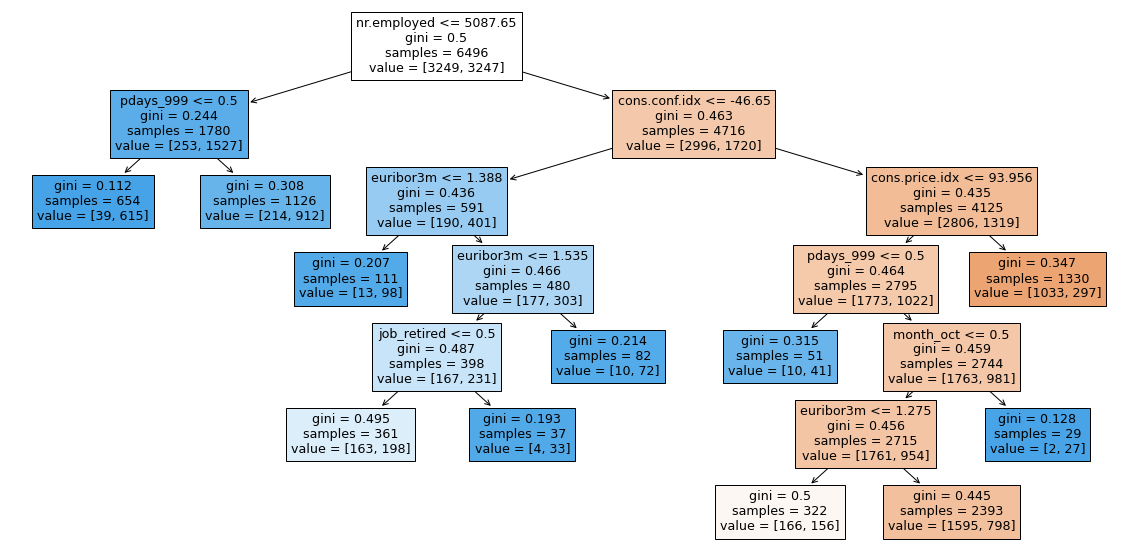

In [167]:
plt.figure(figsize=(20, 10))
plt.show(plot_tree(decision_tree_without_duration_simplified, feature_names=independent_variables_list_without_duration, filled=True))

In [168]:
predictions_without_duration_simplified_training = decision_tree_without_duration_simplified.predict(x_train_without_duration)

In [169]:
predictions_without_duration_simplified_testing = decision_tree_without_duration_simplified.predict(x_test_without_duration)

In [170]:
print(f"{'TRAINING SET' :>33}")
print('')
print('CONFUSION MATRIX')
print(f"{'yes' :>6}{'no' :>5}")
print(confusion_matrix(y_train, predictions_without_duration_simplified_training, labels=['yes', 'no']))
print(classification_report(y_train, predictions_without_duration_simplified_training))
print('-' * 56)
print(f"{'TESTING SET' :>33}")
print('')
print('CONFUSION MATRIX')
print(f"{'yes' :>6}{'no' :>5}")
print(confusion_matrix(y_test, predictions_without_duration_simplified_testing, labels=['yes', 'no']))
print(classification_report(y_test, predictions_without_duration_simplified_testing))

                     TRAINING SET

CONFUSION MATRIX
   yes   no
[[1996 1251]
 [ 455 2794]]
              precision    recall  f1-score   support

          no       0.69      0.86      0.77      3249
         yes       0.81      0.61      0.70      3247

    accuracy                           0.74      6496
   macro avg       0.75      0.74      0.73      6496
weighted avg       0.75      0.74      0.73      6496

--------------------------------------------------------
                      TESTING SET

CONFUSION MATRIX
   yes   no
[[ 879  514]
 [ 180 1211]]
              precision    recall  f1-score   support

          no       0.70      0.87      0.78      1391
         yes       0.83      0.63      0.72      1393

    accuracy                           0.75      2784
   macro avg       0.77      0.75      0.75      2784
weighted avg       0.77      0.75      0.75      2784



####Analyzing a Simplified Model's Behavior

In [171]:
last_decision_tree = DecisionTreeClassifier(random_state=random_state, min_impurity_decrease=0.5, max_depth=4)
#min_impurity_decrease means that a node will be split if the split of a node causes impurity to decrease more or equal to this value.
#Thus 0.5 means that in order to split the node, it must decrease impurity by at least 50%
#max_depth represents the max depth of the TREE. Thus, if 3, the tree will have up to three depths.

In [172]:
last_decision_tree

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.5, random_state=0)

In [173]:
last_decision_tree = last_decision_tree.fit(x_train_without_duration, y_train)

In [174]:
print(export_text(last_decision_tree))

|--- class: no



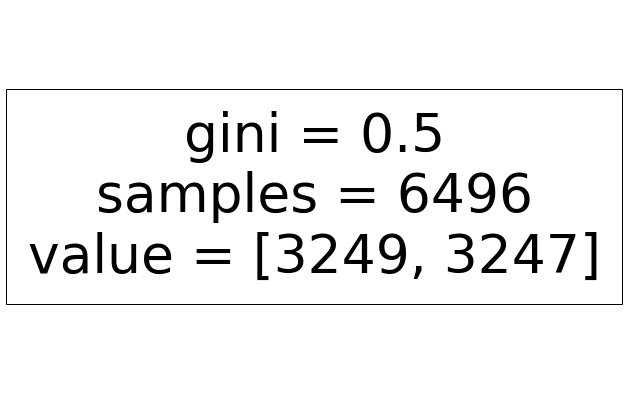

In [175]:
plt.figure(figsize=(11, 7))
plt.show(plot_tree(last_decision_tree))

In [176]:
%%shell
jupyter nbconvert --to html DecisionTreeClassification_Evaluation_Tremonti_Frederico.ipynb

[NbConvertApp] Converting notebook DecisionTreeClassification_Evaluation_Tremonti_Frederico.ipynb to html
[NbConvertApp] Writing 829729 bytes to DecisionTreeClassification_Evaluation_Tremonti_Frederico.html
